<a href="https://colab.research.google.com/github/SanjaraT/Predicting-Diabetes/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Loading Dataset

In [138]:
df=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


#Dataset Info

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


#Data Description

In [140]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [141]:
df.shape

(2000, 9)

#Missing Values

In [142]:
missing_values = df.isnull().sum()

# Display the columns with missing values
if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


#Histogram

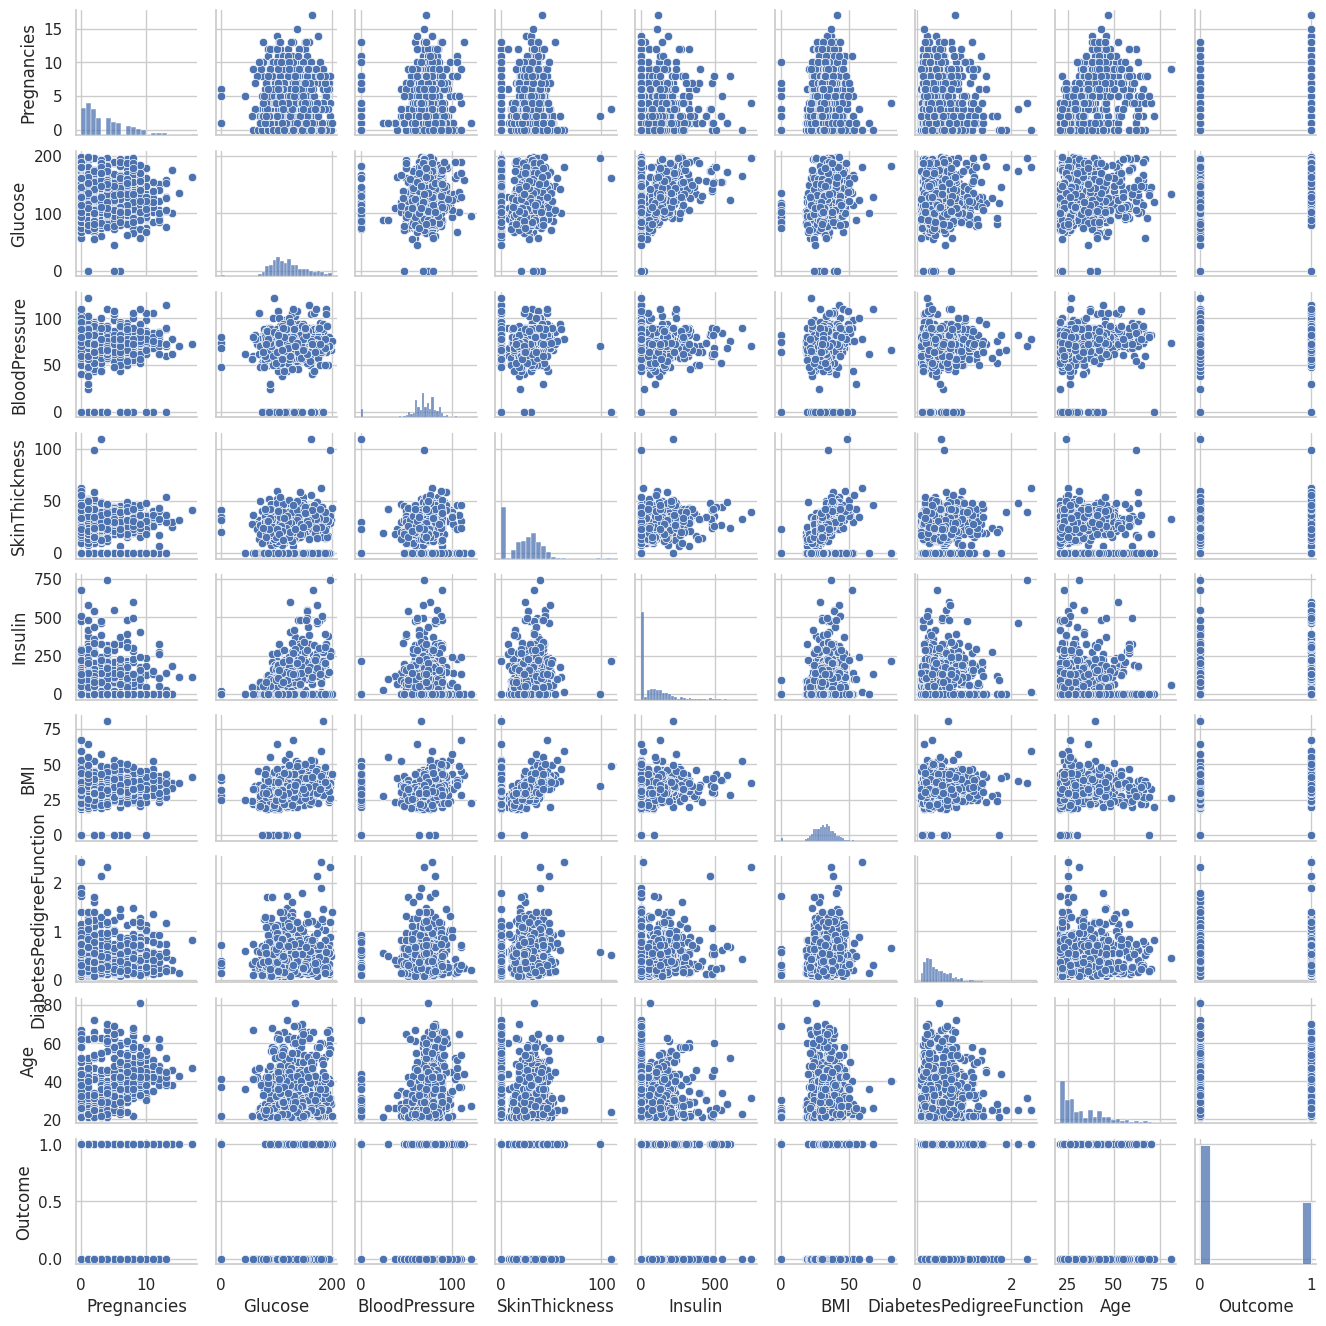

In [143]:
sns.pairplot(df, height=1.5);
plt.show()

#Class Distribution

Class Distribution:
Outcome
0    1316
1     684
Name: count, dtype: int64


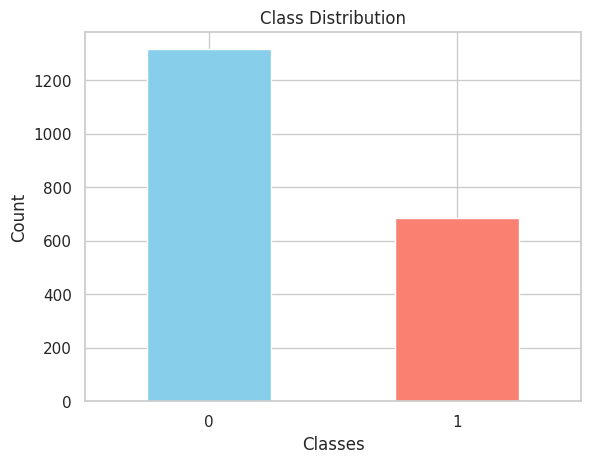

In [166]:
class_distribution = df['Outcome'].value_counts()

# Display the distribution
print("Class Distribution:")
print(class_distribution)

# Plot the class distribution for better visualization
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Check if dataset is imbalanced
total = class_distribution.sum()
imbalanced = any(class_distribution / total < 0.2)

#Correlation

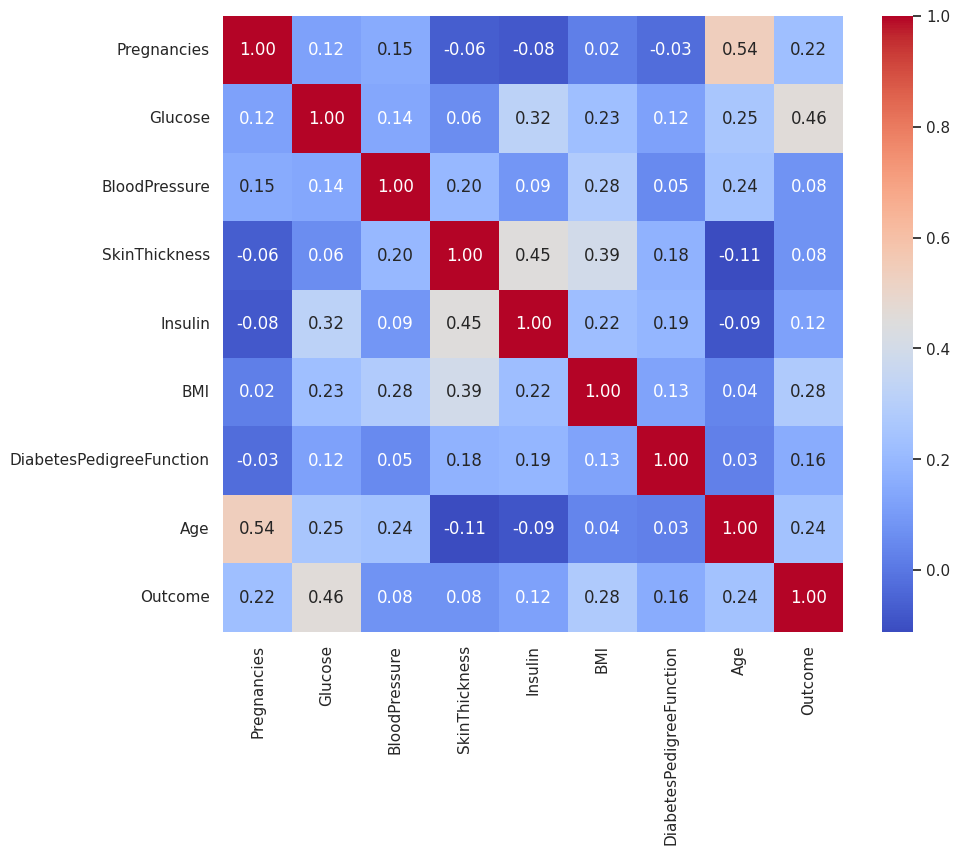

In [145]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap ='coolwarm', fmt=".2f")
plt.show()

#Outlier Visualization

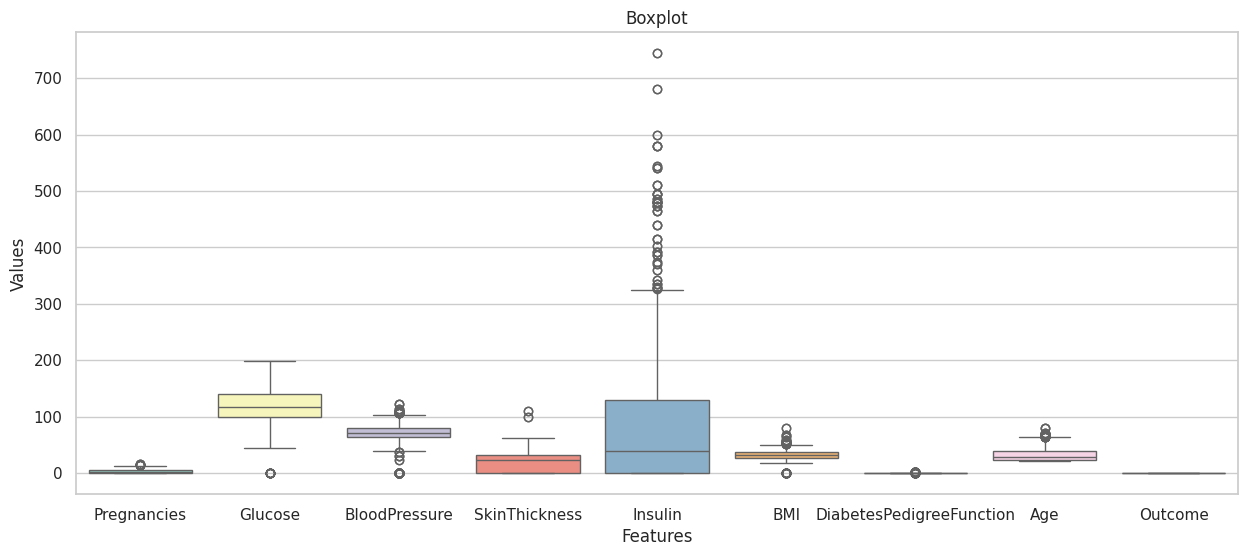

In [146]:
sns.set(style="whitegrid")


plt.figure(figsize=(15, 6))
sns.boxplot(data=df, palette="Set3")


plt.title("Boxplot")
plt.xlabel("Features")
plt.ylabel("Values")


plt.show()

#Handling Outlier

In [147]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)


---Q1--- 
 Pregnancies                  1.000
Glucose                     99.000
BloodPressure               63.500
SkinThickness                0.000
Insulin                      0.000
BMI                         27.375
DiabetesPedigreeFunction     0.244
Age                         24.000
Outcome                      0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.500
SkinThickness                32.000
Insulin                     130.000
BMI                           9.425
DiabetesPedigreeFunction      0.380
Age                 

In [148]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((2000, 9), (1652, 9))

#Balancing Data

In [149]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [150]:
X = df_out.drop('Outcome', axis=1)  # Features
y = df_out['Outcome']  # Target variable

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

In [152]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#New DataFrame with Resampled data

In [167]:
balanced_df = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Outcome'])], axis=1)
balanced_df.shape

(1832, 9)

#Class Distribution after using SMOTE

Class Distribution:
Outcome
1    916
0    916
Name: count, dtype: int64


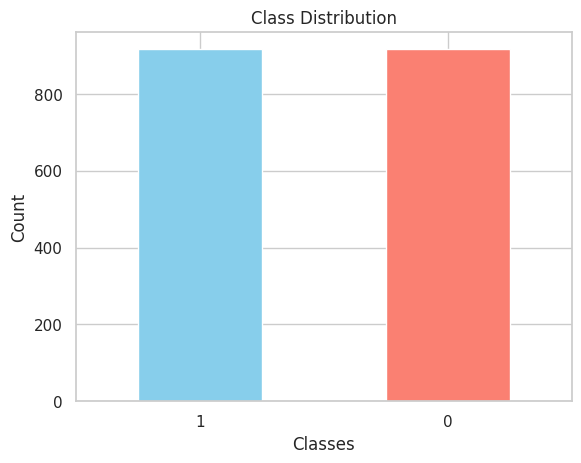

In [168]:
class_distribution = balanced_df['Outcome'].value_counts()

# Display the distribution
print("Class Distribution:")
print(class_distribution)

# Plot the class distribution for better visualization
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#Correalation after SMOTE

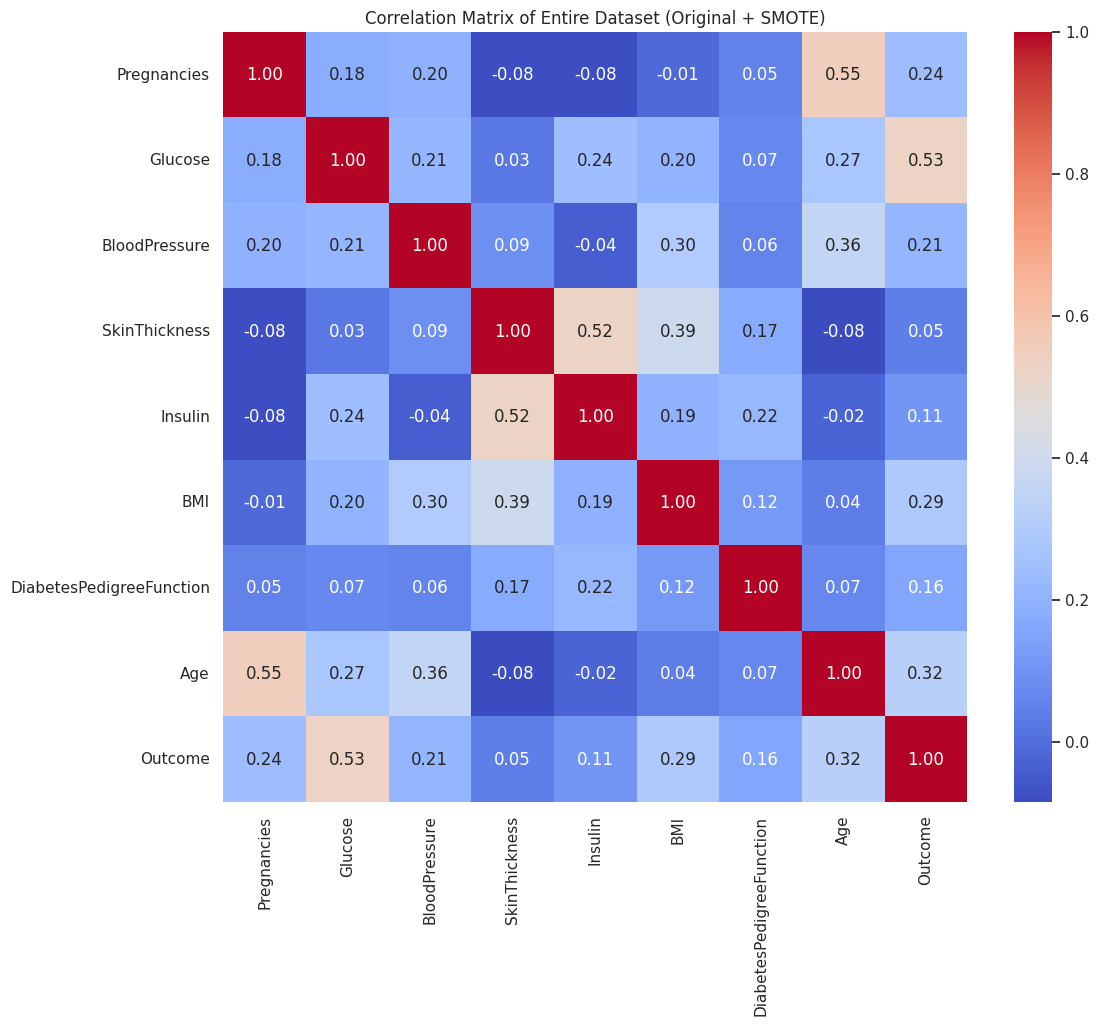

In [169]:
# Visualize the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(balanced_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Entire Dataset (Original + SMOTE)')
plt.show()

#Model Construction

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Defining Models

In [171]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

#initializing k-cross validation and result metrics

In [172]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}
confusion_matrices = {}

#Models

In [173]:
for name, model in models.items():
    # Perform cross-validation predictions
    y_pred = cross_val_predict(model, X_train_resampled, y_train_resampled, cv=kf)

    # Confusion matrix
    cm = confusion_matrix(y_train_resampled, y_pred)
    confusion_matrices[name] = cm

    # Classification report (optional, for detailed performance metrics)
    report = classification_report(y_train_resampled, y_pred, output_dict=True)
    results[name] = report["accuracy"]  # Store accuracy for comparison

    # Print confusion matrix for each model
    print(f"{name} Confusion Matrix:\n", cm)
    print(f"Classification Report:\n", pd.DataFrame(report))
    print("\n" + "-" * 50 + "\n")

Logistic Regression Confusion Matrix:
 [[708 208]
 [246 670]]
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision    0.742138    0.763098  0.752183     0.752618      0.752618
recall       0.772926    0.731441  0.752183     0.752183      0.752183
f1-score     0.757219    0.746934  0.752183     0.752077      0.752077
support    916.000000  916.000000  0.752183  1832.000000   1832.000000

--------------------------------------------------

SVM Confusion Matrix:
 [[717 199]
 [229 687]]
Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision    0.757928    0.775395  0.766376     0.766662      0.766662
recall       0.782751    0.750000  0.766376     0.766376      0.766376
f1-score     0.770140    0.762486  0.766376     0.766313      0.766313
support    916.000000  916.000000  0.766376  1832.000000   1832.000000

--------------------------------------------------

Naive Bayes Confusion Matrix

#ROC-AUC curve

In [174]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

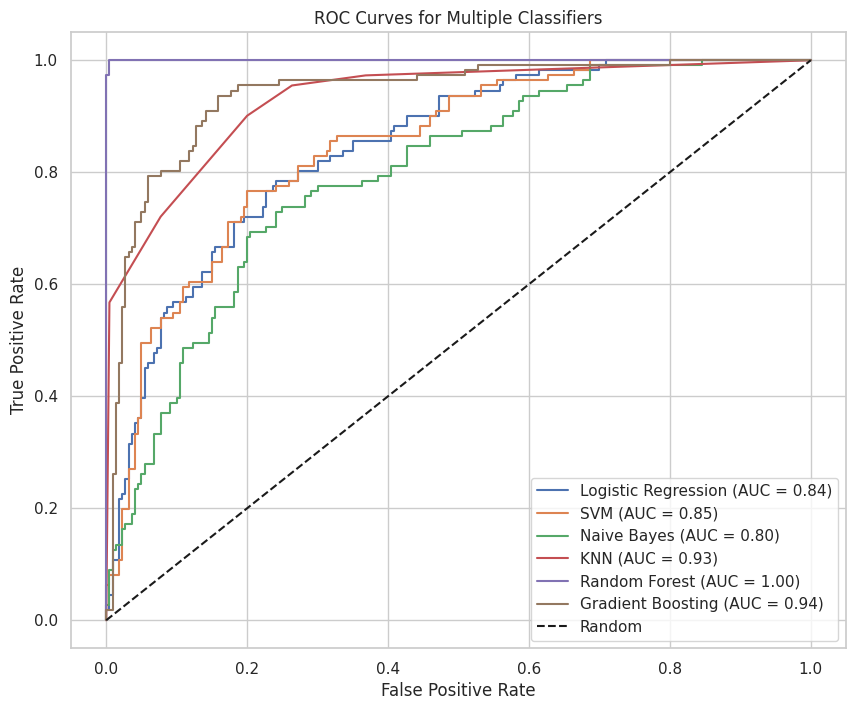

In [175]:
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Get predicted probabilities for the positive class
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Classifiers')
plt.legend(loc='lower right')
plt.show()